# Plotting Figures 4 - 7 and Tables 3 - 5 from our paper (cf. Sections 7.2 - 7.4)

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Helper Functions for Plotting

In [45]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax):

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x,y - 0.05*y,f'{round(value)}',
                horizontalalignment='center',fontsize=12,color='black',weight='semibold',
                       #bbox=dict(facecolor='#445A64')
                       #bbox=dict(facecolor='lightgray')
                      )
        # create median-colored border around white text for contrast
        #text.set_path_effects([
        #    path_effects.Stroke(linewidth=3, foreground=median.get_color()),
        #    path_effects.Normal(),
        #])

def add_avg_labels(ax):
    import matplotlib.patheffects as path_effects

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    print(lines_per_box)
    # iterate over median lines
    for median in lines[5:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.2f}', ha='center', va='center',
                       fontweight='bold', color='white', bbox=dict(facecolor='#445A69'))
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize="small") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Load Results for different Meta-Feature Sets (cf. Section 7.2)

In [46]:
merged_results = pd.DataFrame()
mfs =[
    "general",
      "statistical", 
      "info-theory",
      ["statistical", "info-theory"],
      ["statistical", "general"],
      ["info-theory", "general"],
      ["statistical", "info-theory", "general"], 
    #"optics",
    "meanshift",
    "autocluster"
     ]

mf_mapping ={
    "general": "General",
      "statistical": "Stats", 
      "info-theory": "Info",
      "+".join(["statistical", "info-theory"]): "Stats+Info",
      "+".join(["statistical", "general"]): "Stats+General",
      "+".join(["info-theory", "general"]): "Info+General",
      "+".join(["statistical", "info-theory", "general"]): "Stats+Info+General", 
    #"optics": "O",
    "meanshift": "MF - AutoClust",
    "autocluster": "MF - AutoCluster",
#    "CVI (CH)": "CVI (CH)"
}


mf_orders = ['+'.join(x) if isinstance(x, list) else x for x in mfs]
print(mf_orders)
mf_results = pd.DataFrame()
for mf in mfs:
    print(mf)
    if isinstance(mf, list):
        mf = '+'.join(mf)
    mf_df = pd.read_csv(f"../synthetic_data/results_{mf}.csv")
    #for x in ["_1", "_2", "_3"]:
    #    mf_df = pd.read_csv(f"{mf}_online_result{x}.csv", index_col=0)
    mf_df["Meta-Feature Set"] = mf
    mf_results = pd.concat([mf_results, mf_df])


mf_results["Meta-Feature Set"].unique()
mf_results["ARI"] = mf_results["ARI"].apply(lambda x: x if x > 0 else x*-1)
mf_results["Meta-Feature Set"] = pd.Categorical(mf_results["Meta-Feature Set"], categories=mf_orders, ordered=True)
mf_results["Meta-Feature Set"] =  mf_results["Meta-Feature Set"].apply(lambda mf: mf_mapping[mf])
mf_results = mf_results
############################################################################
#### Some Preprocessing stuff --> assign dataset properties as columns #####

# todo: first attempt to show ARI over time --> Does not look really good ...
mf_results["time interval"] = mf_results["wallclock time"].apply(lambda x: int(x/30))
#dataset_types = ["gaussian", "varied", "circles"
#print('type=varied-k=30-n=2000-d=10-noise=0'.split('-')[0].split('=')[1])
mf_results["type"] = mf_results["dataset"].apply(lambda x: x.split('-')[0].split('=')[1])
mf_results["n"] =  mf_results["dataset"].apply(lambda x: x.split('-')[2].split('=')[1]).astype(int)
mf_results["d"] =  mf_results["dataset"].apply(lambda x: x.split('-')[3].split('=')[1]).astype(int)
mf_results["noise"] = mf_results["dataset"].apply(lambda x: x.split('-')[4].split('=')[1]).astype(float)
mf_results["k"] = mf_results["dataset"].apply(lambda x: x.split('-')[1].split('=')[1]).astype(float)
mf_results["Meta-Feature Set"].unique()

['general', 'statistical', 'info-theory', 'statistical+info-theory', 'statistical+general', 'info-theory+general', 'statistical+info-theory+general', 'meanshift', 'autocluster']
general
statistical
info-theory
['statistical', 'info-theory']
['statistical', 'general']
['info-theory', 'general']
['statistical', 'info-theory', 'general']
meanshift
autocluster


['General', 'Stats', 'Info', 'Stats+Info', 'Stats+General', 'Info+General', 'Stats+Info+General', 'MF - AutoClust', 'MF - AutoCluster']
Categories (9, object): ['General' < 'Stats' < 'Info' < 'Stats+Info' ... 'Info+General' < 'Stats+Info+General' < 'MF - AutoClust' < 'MF - AutoCluster']

In [47]:
metric_ranking = pd.read_csv("../synthetic_data/metric_ranking.csv", index_col=0)
metric_ranking["accuracy"] = metric_ranking.apply(lambda x: int(x["metric"] == x["optimal metric"]), axis=1)
metric_ranking["Meta-Feature Set"] = metric_ranking["mf_set"]
metric_ranking = metric_ranking.drop("mf_set", axis=1)
metric_ranking["Meta-Feature Set"] =  metric_ranking["Meta-Feature Set"].apply(lambda mf: mf if mf == "optics" else mf_mapping[mf])
cvi_acc = metric_ranking.groupby(["Meta-Feature Set"])["accuracy"].mean().reset_index()
cvi_acc = cvi_acc[cvi_acc["Meta-Feature Set"] != "optics"]
mf_ari_runtime = mf_results[mf_results["iteration"] == 25].groupby(["Meta-Feature Set"])["ARI", "mf time"].mean().reset_index()
def cvi_accuracy(mf_set):
    if mf_set == "MF - AutoCluster":
        return 0.667
    else:
        return cvi_acc[cvi_acc["Meta-Feature Set"] == mf_set]["accuracy"].values[0]
mf_ari_runtime["CVI Selection"] = mf_ari_runtime["Meta-Feature Set"].apply(lambda x: cvi_accuracy(x))
mf_ari_runtime["ARI (w=25)"] = mf_ari_runtime["ARI"]
mf_ari_runtime["Runtime Meta-Feature Extraction"] = mf_ari_runtime["mf time"]
mf_ari_runtime = mf_ari_runtime.drop(["ARI", "mf time"], axis=1)

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/3655163498.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mf_ari_runtime = mf_results[mf_results["iteration"] == 25].groupby(["Meta-Feature Set"])["ARI", "mf time"].mean().reset_index()


## Generate Table 3

In [48]:
mf_ari_runtime.to_csv("Table3.csv")
mf_ari_runtime

Meta-Feature Set  CVI Selection  ARI (w=25)  \
0             General       0.461538    0.893550   
1               Stats       0.692308    0.908588   
2                Info       0.602564    0.873839   
3          Stats+Info       0.679487    0.892905   
4       Stats+General       0.692308    0.933005   
5        Info+General       0.576923    0.880321   
6  Stats+Info+General       0.717949    0.933141   
7      MF - AutoClust       0.551282    0.762352   
8    MF - AutoCluster       0.667000    0.914744   

   Runtime Meta-Feature Extraction  
0                         0.066934  
1                         0.191514  
2                         1.118662  
3                         1.188666  
4                         0.198176  
5                         1.119946  
6                         4.010692  
7                        82.844989  
8                        35.688843

### Load Synthetic Data Results

In [49]:
#coldstart_df = pd.concat([pd.read_csv(f'coldstart_online_result_{i}.csv', index_col=None) for i in range(1, 4)])
aml4c_df = pd.read_csv(f'../related_work/aml4c_results.csv', index_col=False)
aml4c_df["type"] = aml4c_df["dataset"].apply(lambda x: x.split('-')[0].split('=')[1])
aml4c_df["n"] =  aml4c_df["dataset"].apply(lambda x: x.split('-')[2].split('=')[1]).astype(int)
aml4c_df["d"] = aml4c_df["dataset"].apply(lambda x: x.split('-')[3].split('=')[1]).astype(int)
aml4c_df["noise"] = aml4c_df["dataset"].apply(lambda x: x.split('-')[4].split('=')[1]).astype(float)
aml4c_df["k"] = aml4c_df["dataset"].apply(lambda x: x.split('-')[1].split('=')[1]).astype(float)
aml4c_df["ARI"] = aml4c_df["ARI"].apply(lambda x: x if x > 0 else x*-1)
aml4c_df["Method"] = aml4c_df.apply(lambda x: f"AML4C ({x['metric']})", axis=1)

In [50]:
merged_results = pd.DataFrame()

#stats_df = pd.concat([pd.read_csv(f'A4DC_results/statistical_online_result_{i}.csv', index_col=None) for i in range(1,4)])
#stats_general_df = pd.concat([pd.read_csv(f'A4DC_results/statistical+general_online_result_{i}.csv', index_col=None) for i in range(1,4)])

stats_general_df = pd.read_csv(f'../synthetic_data/results_statistical+general.csv', index_col=None)
#stats_df = pd.read_csv(f'../../synthetic_data/results_statistical.csv', index_col=None)
#stats_general_df = pd.read_csv(f'statistical+general_online_result.csv', index_col =None)
stats_info_general_df = pd.read_csv(f'../synthetic_data/results_statistical+info-theory+general.csv', index_col=None)

#stats_info_general_df = pd.concat([pd.read_csv(f'A4DC_results/statistical+info-theory+general_online_result_{i}.csv', index_col=None) for i in range(1,4)])
#stats_item_mfe_df = pd.read_csv(f'stats_itemset_mfe_online_result{x}.csv', index_col=None)

#a_for_dc_autocluster_df = pd.concat([pd.read_csv(f'A4DC_results/autocluster_online_result_{i}.csv', index_col=None) for i in range(1,4)])
a_for_dc_autocluster_df = pd.read_csv(f'../synthetic_data/results_autocluster.csv', index_col=None)

#stats_df["Method"] = "ML2DAC (Stats)"
stats_general_df["Method"] = "ML2DAC (Stats+General)"
stats_info_general_df["Method"] = "ML2DAC (Stats+Info+General)"
a_for_dc_autocluster_df["Method"] = "ML2DAC - AutoCluster"
    #stats_item_mfe_df["Method"] = "A4CDC - stats+item"

    
#related_work_online_df = pd.read_csv('related_work/related_work_online_result.csv', index_col=None)
related_work_online_df = pd.read_csv('../related_work/autoclust.csv', index_col=None)

related_work_online_df["Method"] = "AutoClust"

autocluster_df = pd.read_csv("../related_work/autocluster_mv.csv")
print(autocluster_df["Method"].unique)
autocluster_df = autocluster_df[autocluster_df["Method"] == "AutoCluster - MV"]
autocluster_df["Method"] = "AutoCluster"
merged_results = pd.concat([#stats_df,
                            stats_general_df, stats_info_general_df, a_for_dc_autocluster_df, 
    autocluster_df, related_work_online_df, aml4c_df])



merged_results = pd.concat([merged_results, related_work_online_df])
related_work_online_df[related_work_online_df['ARI'] == related_work_online_df['ARI'].min()]
merged_results = pd.concat([merged_results, aml4c_df])

<bound method Series.unique of 0        AutoCluster - SIL
1        AutoCluster - SIL
2        AutoCluster - SIL
3        AutoCluster - SIL
4        AutoCluster - SIL
               ...        
31195     AutoCluster - MV
31196     AutoCluster - MV
31197     AutoCluster - MV
31198     AutoCluster - MV
31199     AutoCluster - MV
Name: Method, Length: 31200, dtype: object>


### Merge Results/ Some Preprocessing Stuff

In [51]:
merged_results["ARI"] = merged_results["ARI"].apply(lambda x: x if x > 0 else x*-1)
if "algorihtm" in merged_results.columns:
    merged_results["algorithm"] = merged_results["algorihtm"]
    merged_results = merged_results.drop("algorihtm", axis='columns')

############################################################################
#### Some Preprocessing stuff --> assign dataset properties as columns #####

merged_results["time interval"] = merged_results["wallclock time"].apply(lambda x: int(x/30))
merged_results["type"] = merged_results["dataset"].apply(lambda x: x.split('-')[0].split('=')[1])
merged_results["n"] =  merged_results["dataset"].apply(lambda x: x.split('-')[2].split('=')[1]).astype(int)
merged_results["d"] =  merged_results["dataset"].apply(lambda x: x.split('-')[3].split('=')[1]).astype(int)
merged_results["noise"] = merged_results["dataset"].apply(lambda x: x.split('-')[4].split('=')[1]).astype(float)
merged_results["k"] = merged_results["dataset"].apply(lambda x: x.split('-')[1].split('=')[1]).astype(float)

datasets = merged_results["dataset"].unique()
metrics = merged_results["metric"].unique()
methods = merged_results["Method"].unique()

## Generate Figure 4

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/2552994629.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selcted_methods["ARI"] = selcted_methods["ARI"] * 100
/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/2552994629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selcted_methods["Method"] = pd.Categorical(selcted_methods["Method"], ordered=True,  categories=methods_to_use)


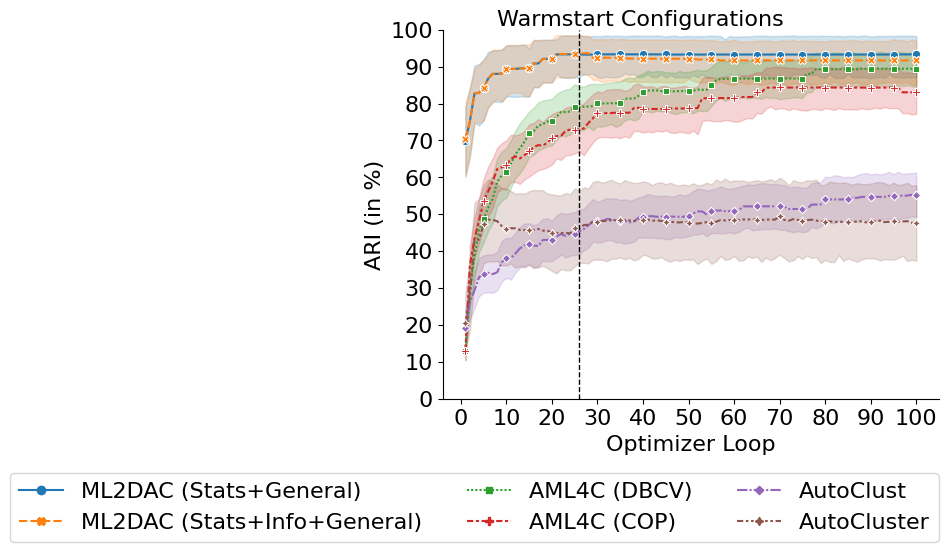

In [52]:
methods_to_use = ["ML2DAC (Stats+General)",
                  "ML2DAC (Stats+Info+General)", 
                  "AML4C (DBCV)",
                  "AML4C (COP)",
                  "AutoClust", 
                  "AutoCluster",
                 ]

selcted_methods = merged_results[merged_results["Method"].isin(methods_to_use)]
selcted_methods["ARI"] = selcted_methods["ARI"] * 100

selcted_methods["Method"] = pd.Categorical(selcted_methods["Method"], ordered=True,  categories=methods_to_use)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
selcted_methods = selcted_methods.reset_index()
ax = sns.lineplot(x="iteration", y="ARI", markevery=[0]+[x for x in range(4, 100, 5)] + [99], markers=True,style="Method", 
                  data=selcted_methods
                  , hue="Method",
                 )

ax.set_xticks([0] + list(range(10, 105, 10)))
ax.set_xlabel(r"Optimizer Loop")
ax.set_ylim([0, 100])
ax.set_yticks([ x for x in range(0, 110, 10)])
ax.set_ylabel("ARI (in %)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend = plt.legend()
handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(bbox_to_anchor=(1.0, -0.2), loc=0, borderaxespad=0., ncol=3)
ax.axvline(x=26, c='black', linestyle="--", linewidth=1, label="Warmstart Configs")
ax.text(8, 101, "Warmstart Configurations")

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("Fig4_accuracy_average_baselines.pdf", bbox_inches='tight')
plt.show()
#plt.close()

## Generate Figure 5 (a - d)

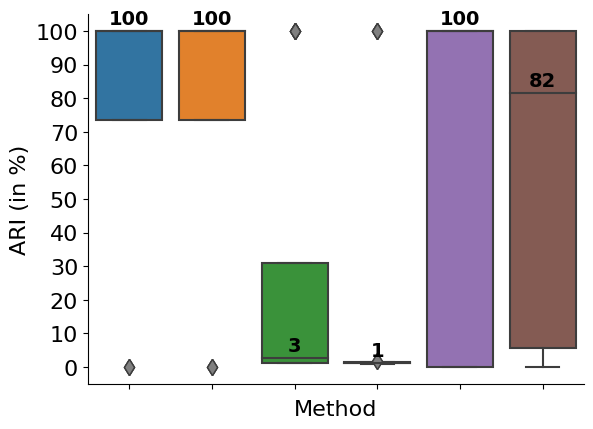

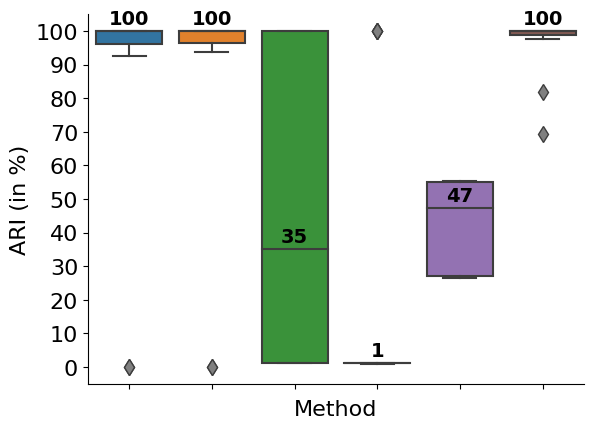

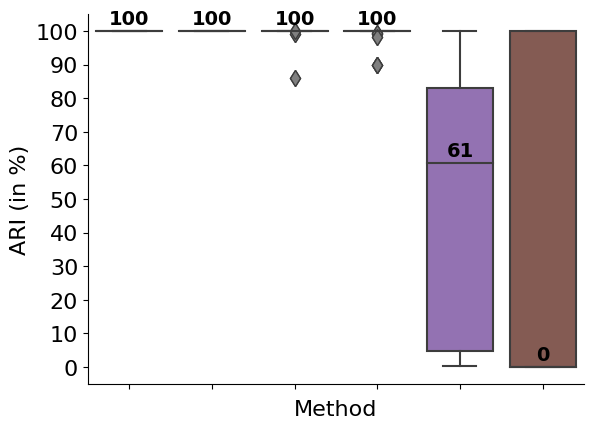

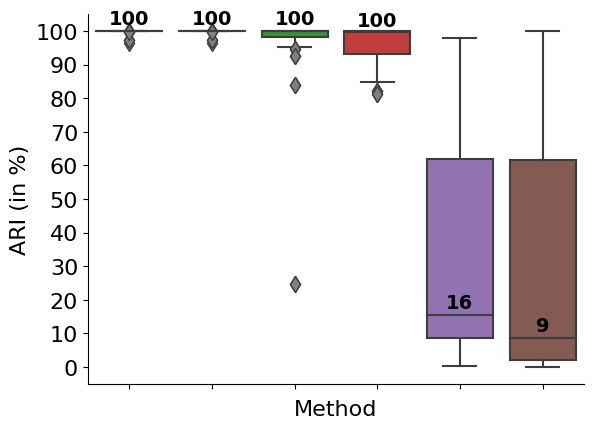

In [53]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

types = ["circles", "moons", "gaussian", "varied"]
for type_, subfig in zip(types,
    #selcted_methods["type"].unique(),
                         ["a", "b", "c", "d"]):
    type_methods = selcted_methods[selcted_methods["type"] == type_]
    #type_methods["ARI"] = type_methods["ARI"] * 100
    flierprops = dict(markerfacecolor='grey',
        markersize=8,
              #linestyle='--'
                     )
    
    data = type_methods[(type_methods["iteration"] == 25)
                                       #& (type_methods["noise"] < 0.1)
                                      ]
    avgs = data.groupby(['Method'])['ARI'].mean()
    medians = data.groupby(['Method'])['ARI'].median()

    vertical_offset = data['ARI'].mean() * 0.05 # offset from median for display

        
    ax = sns.boxplot(data=data,
                     x="Method", 
                     y="ARI", 
                     flierprops=flierprops,
                      )

    for xtick in ax.get_xticks():
        text = ax.text(xtick,medians[xtick] + 2,f'{round(medians[xtick])}',
                horizontalalignment='center',fontsize=14,color='black',weight='bold',
                      )
    ax.set_xticklabels([], rotation = 35, ha="right")
    #ax.set_title(type_)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylim(-5,105)
    ax.set_ylabel(r'ARI (in %)')
    ax.set_yticks([x for x in range(0, 110,10)])
    plt.savefig(f"Fig_5{subfig}_accuracy_distribution_{type_}.pdf", bbox_inches='tight')
    plt.show()
    plt.close()

# Generate Figure 6a and 6b


In [54]:
merged_results = pd.DataFrame()

#stats_df = pd.concat([pd.read_csv(f'A4DC_results/statistical_online_result_{i}.csv', index_col=None) for i in range(1,4)])
#stats_general_df = pd.concat([pd.read_csv(f'A4DC_results/statistical+general_online_result_{i}.csv', index_col=None) for i in range(1,4)])

stats_general_df = pd.read_csv(f'../synthetic_data/results_statistical+general.csv', index_col=None)
#stats_df = pd.read_csv(f'../../synthetic_data/results_statistical.csv', index_col=None)
#stats_general_df = pd.read_csv(f'statistical+general_online_result.csv', index_col =None)
stats_info_general_df = pd.read_csv(f'../synthetic_data/results_statistical+info-theory+general.csv', index_col=None)

#stats_info_general_df = pd.concat([pd.read_csv(f'A4DC_results/statistical+info-theory+general_online_result_{i}.csv', index_col=None) for i in range(1,4)])
#stats_item_mfe_df = pd.read_csv(f'stats_itemset_mfe_online_result{x}.csv', index_col=None)

#a_for_dc_autocluster_df = pd.concat([pd.read_csv(f'A4DC_results/autocluster_online_result_{i}.csv', index_col=None) for i in range(1,4)])
a_for_dc_autocluster_df = pd.read_csv(f'../synthetic_data/results_autocluster.csv', index_col=None)

stats_general_df["Method"] = "ML2DAC (Stats+General)"
stats_info_general_df["Method"] = "ML2DAC (Stats+Info+General)"
a_for_dc_autocluster_df["Method"] = "ML2DAC - AutoCluster"
    #stats_item_mfe_df["Method"] = "A4CDC - stats+item"

    
#related_work_online_df = pd.read_csv('related_work/related_work_online_result.csv', index_col=None)
related_work_online_df = pd.read_csv('../related_work/autoclust.csv', index_col=None)

related_work_online_df["Method"] = "AutoClust"

autocluster_df = pd.read_csv("../related_work/autocluster_mv.csv")
print(autocluster_df["Method"].unique)
#autocluster_df = autocluster_df[autocluster_df["Method"] == "AutoCluster - MV"]
autocluster_df["Method"] = "AutoCluster"
merged_results = pd.concat([stats_general_df, stats_info_general_df,a_for_dc_autocluster_df, 
                            autocluster_df, related_work_online_df, aml4c_df])



merged_results = pd.concat([merged_results, related_work_online_df])
related_work_online_df[related_work_online_df['ARI'] == related_work_online_df['ARI'].min()]
merged_results = pd.concat([merged_results, aml4c_df])


<bound method Series.unique of 0        AutoCluster - SIL
1        AutoCluster - SIL
2        AutoCluster - SIL
3        AutoCluster - SIL
4        AutoCluster - SIL
               ...        
31195     AutoCluster - MV
31196     AutoCluster - MV
31197     AutoCluster - MV
31198     AutoCluster - MV
31199     AutoCluster - MV
Name: Method, Length: 31200, dtype: object>


In [55]:
autoCluster_pivot =autocluster_df.pivot(index=["dataset", "iteration"], columns="metric", values=["runtime"])
autoCluster_pivot["sum"] = autoCluster_pivot["runtime"]["CH"].cumsum() + autoCluster_pivot["runtime"]["SIL"].cumsum() +  autoCluster_pivot["runtime"]["DBI"].cumsum()

In [56]:
related_work_online_df["wallclock time"] = related_work_online_df.apply(lambda row: max(7200, row["max wallclock"]) if row["iteration"] >= row["max iteration"] else row["wallclock time"], axis=1)

In [57]:
mv_autocluster = autocluster_df
for data, iteration in autoCluster_pivot.index:
    mv_autocluster.loc[(mv_autocluster["dataset"] == data) & (mv_autocluster["iteration"] == iteration)]["wallclock time"] = autoCluster_pivot["sum"][data, iteration]
mv_autocluster["wallclock time"] = autoCluster_pivot["sum"].reset_index()["sum"]
for data in mv_autocluster["dataset"].unique():
    mv_autocluster.loc[mv_autocluster["dataset"] == data,"max wallclock"] = mv_autocluster[mv_autocluster["dataset"] == data]["wallclock time"].max()
mv_autocluster["Method"] = "AutoCluster"
mv_autocluster["wallclock time"].max()

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/2376867211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_autocluster.loc[(mv_autocluster["dataset"] == data) & (mv_autocluster["iteration"] == iteration)]["wallclock time"] = autoCluster_pivot["sum"][data, iteration]
/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/2376867211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_autocluster.loc[(mv_autocluster["dataset"] == data) & (mv_autocluster["iteration"] == iter

19285.26218032837

In [58]:
merged_df = pd.DataFrame()

autocluster_df["Method"] = "AutoCluster"
for df in [stats_general_df, stats_info_general_df, aml4c_df[aml4c_df["metric"]== "DBCV"], aml4c_df[aml4c_df["metric"]== "COP"], related_work_online_df, mv_autocluster
          ]:
    new_df = pd.DataFrame()
    for dataset in df["dataset"].unique():
        mask = (df["dataset"] == dataset)
        data_df = df[mask]
        max_iteration = data_df["max iteration"].values[0]
        mask_2 = data_df["iteration"] <= max_iteration
        data_df = data_df[mask_2]
    
        data_df["wallclock time"]  = data_df["runtime"].cumsum()
            
        data_df["max wallclock"]  = data_df["wallclock time"].max()
        new_df = pd.concat([new_df, data_df]) 
           
    merged_df = pd.concat([merged_df, new_df])
merged_df = pd.concat([merged_df, mv_autocluster, related_work_online_df])
merged_df[(merged_df["Method"] == "AutoCluster")]["wallclock time"].max()

19285.26218032837

In [59]:
merged_df["type"] = merged_df["dataset"].apply(lambda x: x.split('-')[0].split('=')[1])
merged_df["n"] =  merged_df["dataset"].apply(lambda x: x.split('-')[2].split('=')[1]).astype(int)
merged_df["d"] =  merged_df["dataset"].apply(lambda x: x.split('-')[3].split('=')[1]).astype(int)
merged_df["noise"] = merged_df["dataset"].apply(lambda x: x.split('-')[4].split('=')[1]).astype(float)
merged_df["k"] = merged_df["dataset"].apply(lambda x: x.split('-')[1].split('=')[1]).astype(float)
if "algorihtm" in merged_df.columns:
    merged_df["algorithm"] = merged_df["algorihtm"]
    merged_df = merged_df.drop("algorihtm", axis='columns')
afourC_cop = merged_df[merged_df["Method"] == "AutoCluster"]

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/2313245535.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([10, 100, 1000, 10000])
No handles with labels found to put in legend.


{0: 30, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50}


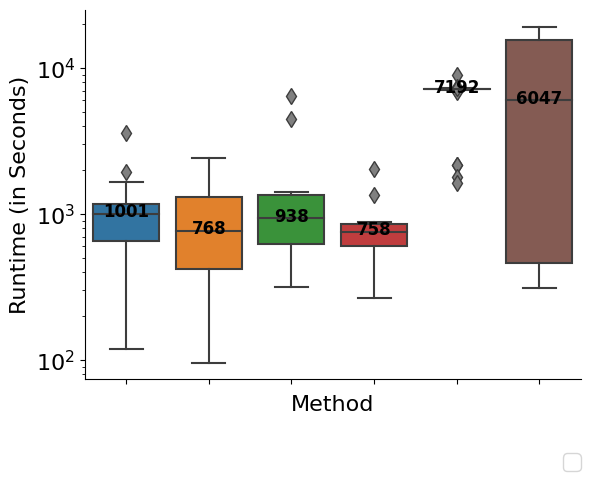

In [60]:
flierprops = dict(markerfacecolor='grey',
        markersize=8,
              #linestyle='--'
                     )

data = merged_df[(merged_df["iteration"] == 100) & (merged_df["n"] == 10000)]
avgs = data.groupby(['Method'])['max wallclock'].median()
medians = data.groupby(['Method'])['max wallclock'].median()


vertical_offset = {0: 30, 1: 50,2: 50,3: 50,4: 50,5: 50}
print(vertical_offset)
ax = sns.boxplot(data=data, x="Method", y="max wallclock", flierprops=flierprops
                )
ax.set_yticklabels([10, 100, 1000, 10000])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
ax.set_yscale("log")
legend = plt.legend(bbox_to_anchor=(1.0, -0.2), loc=0, borderaxespad=0., ncol=3, 
                   # handles=handles[1:], labels=labels[1:]
)
add_median_labels(ax)
ax.set_xticklabels([], rotation = 35, ha="right")
y_labels = ax.get_yticklabels()
y_lims = ax.get_ylim()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Runtime (in Seconds)")
plt.savefig("Fig6b_runtime_comparison_large.pdf", bbox_inches='tight')

In [61]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax):

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x,y - 0.3*y,f'{round(value)}',
                horizontalalignment='center',fontsize=14,color='black',weight='bold',
                       #bbox=dict(facecolor='#445A64')
                       #bbox=dict(facecolor='lightgray')
                      )
        # create median-colored border around white text for contrast
        #text.set_path_effects([
        #    path_effects.Stroke(linewidth=3, foreground=median.get_color()),
        #    path_effects.Normal(),
        #])

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/2742242253.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


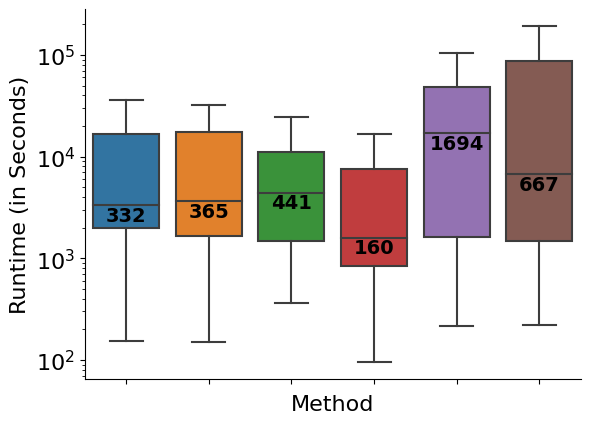

In [62]:
flierprops = dict(markerfacecolor='grey',
        markersize=8,
              #linestyle='--'
                     )

data = merged_df
avgs = data.groupby(['Method'])['max wallclock'].median()
medians = data.groupby(['Method'])['max wallclock'].median()

ax = sns.boxplot(data=merged_df, x="Method", y="max wallclock",
                 #patch_artist=True,
                 #hue="n",
                 #showmeans=True,
                  #meanprops={"marker":"X","markerfacecolor":"white", "markeredgecolor":"black", "markersize": 12},
                 #estimator=np.median
                 showfliers=False
                )

ax.set_xticklabels([], rotation = 45, ha="right")
ax.set_yscale("log")
add_median_labels(ax)
ax.set_yticklabels(y_labels)
#ax.set_ylim(y_lims)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Runtime (in Seconds)")
plt.savefig("Fig6a_runtime_comparison.pdf", bbox_inches='tight')

# Table 4

In [63]:
import os

path = "../varying_training_data"
varying_training_data_results = pd.DataFrame()
for n_train in list(range(2,72,10)):
    dataset_results = os.listdir(path + f"/n_training_data_{n_train}")
    results = pd.concat([pd.read_csv(path + f"/n_training_data_{n_train}"+f"/{data}") for data in dataset_results], ignore_index=True)
    results["n_train"] = n_train
    varying_training_data_results= pd.concat([varying_training_data_results, results], ignore_index=True)
#pd.read_csv("../varying_training_data/n_training_data_2")

In [64]:
varying_training_data_results[varying_training_data_results["iteration"]==100].groupby("n_train")["Best ARI"].mean().reset_index().transpose().to_csv("Table4.csv")

## Real-World results (cf. Section 7.4)

In [1]:
from pathlib import Path, PurePath
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd #xx

In [2]:
data_path = Path("../../real_world_data/")
datasets = [f for f in os.listdir(data_path) if os.path.isfile(data_path /f)]

# 50 warmstarts + 50 loops
# 1 similar dataset
ml2dac_path = Path("../real_world/ML2DAC/")

# New results
#ml2dac_path = Path("ML2DAC/warmstart_and_bo/run_0/")

ml2dac_mf_paths = [Path(x[0]) for x in os.walk(ml2dac_path)]

aml4c_path = Path("../real_world/Baselines/AML4C/")
aml4c_cvi_paths = [Path(x[0]) for x in os.walk(aml4c_path)]

autoclust_path = Path("../real_world/Baselines/AutoClust/")

autocluster_path = Path("../real_world/Baselines/AutoCluster/MV")

method_paths = [autoclust_path, autocluster_path]
method_paths.extend(aml4c_cvi_paths)
method_paths.extend(ml2dac_mf_paths)

In [3]:
all_results = pd.DataFrame()

replacements = {"\\": "-", "/": "-", "-warmstarts": "", "..-": "", "real_world-": "", "Baselines-": "",
           "statistical": "Stats",
                "general": "General", "info-theory": "Info", "-similar_datasets": "",
               "-n_similar_1": "",
                "-run_0": "", 
                "-abl_study": "", 
                "_25": "", 
                "-all": "", 
                "-warmstart_and_bo": ""}

for data in datasets:
    for method_path in method_paths: 
        method_name = str(PurePath(method_path))
        for to_replace, replacement in replacements.items():
            method_name = method_name.replace(to_replace, replacement)
            
        data_path = method_path / data
        
        if data_path.exists():
            print(data_path)

            df = pd.read_csv(data_path)
            if len(df) > 0:
                df["Method"] = method_name
                df["dataset"] = data
                df["Best ARI"] = df["Best ARI"] * -1
                df["Best* ARI"] = df ["Best ARI"].cummax()
                df["ARI"] = df["ARI"] * -1
                df["Ground-truth Best ARI"] = df["ARI"].cummax()
                all_results
                all_results = pd.concat([all_results, df])
        else:
            pass
    #autoclust_data_df = pd.read_csv(autoclust_path / data)
all_results = all_results.reset_index(drop=True)

../real_world/Baselines/AutoClust/iono.csv
../real_world/Baselines/AutoCluster/MV/iono.csv
../real_world/Baselines/AML4C/DI/iono.csv
../real_world/Baselines/AML4C/CH/iono.csv
../real_world/Baselines/AML4C/DBI/iono.csv
../real_world/Baselines/AML4C/DBCV/iono.csv
../real_world/Baselines/AML4C/SIL/iono.csv
../real_world/Baselines/AML4C/CJI/iono.csv
../real_world/Baselines/AML4C/COP/iono.csv
../real_world/ML2DAC/statistical+general/iono.csv
../real_world/ML2DAC/statistical+info-theory+general/iono.csv
../real_world/Baselines/AutoClust/glass.csv
../real_world/Baselines/AutoCluster/MV/glass.csv
../real_world/Baselines/AML4C/DI/glass.csv
../real_world/Baselines/AML4C/CH/glass.csv
../real_world/Baselines/AML4C/DBI/glass.csv
../real_world/Baselines/AML4C/DBCV/glass.csv
../real_world/Baselines/AML4C/SIL/glass.csv
../real_world/Baselines/AML4C/CJI/glass.csv
../real_world/Baselines/AML4C/COP/glass.csv
../real_world/ML2DAC/statistical+general/glass.csv
../real_world/ML2DAC/statistical+info-theory+g

In [4]:
all_results = all_results.reset_index(drop=True)
all_results["Method"].unique()

array(['AutoClust', 'AutoCluster-MV', 'AML4C-DI', 'AML4C-CH', 'AML4C-DBI',
       'AML4C-DBCV', 'AML4C-SIL', 'AML4C-CJI', 'AML4C-COP',
       'ML2DAC-Stats+General', 'ML2DAC-Stats+Info+General'], dtype=object)

In [5]:
methods = [           "ML2DAC-Stats+General",
           "ML2DAC-Stats+Info+General", 
                      "AML4C-DBCV",
           "AML4C-COP", 
           "AutoClust", 
           "AutoCluster-MV",
          ]
method_results = all_results[(all_results["Method"].isin(methods))]

## Generate Figure 7

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_67098/1357703135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method_results["Method"] = pd.Categorical(method_results["Method"], ordered=True,  categories=methods)


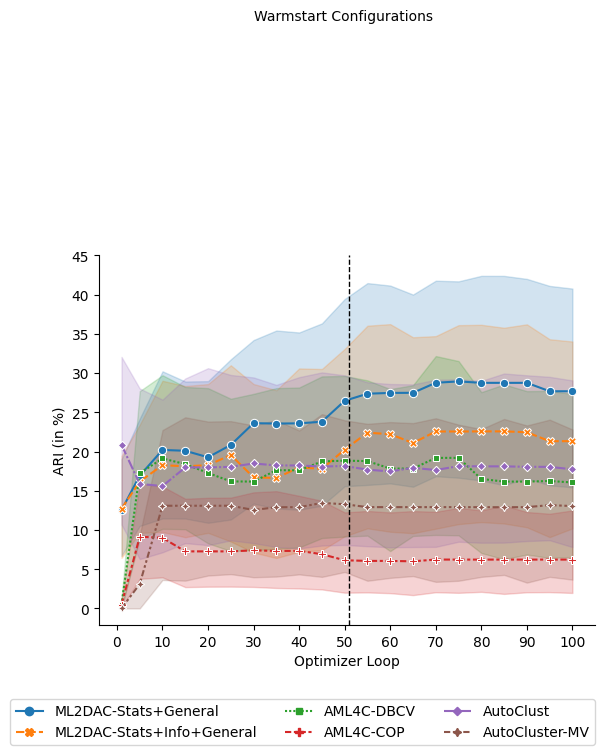

In [6]:
plt.figure()
iterations = list(range(0,101, 5))
iterations.append(1)
#iterations.remove(0)
method_results["Method"] = pd.Categorical(method_results["Method"], ordered=True,  categories=methods)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

data = method_results[method_results["iteration"].isin(iterations)]
data = data[~data["dataset"].isin(["mnist-fashion.csv", "mnist-digits.csv", 
                        #"letter.csv", 
    "handwritten_digits.csv"
                                  ])]
data["Best ARI"] = data["Best ARI"] * 100
#data = data[~data["dataset"].isin(bad_data)]
ax = sns.lineplot(x="iteration", y="Best ARI", 
                  data=data,
                  hue="Method", 
                  style="Method", markers=True, markevery=1, #ci=None
                 )
#ax.set_title("Average ARI over all real-world datasets")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel("ARI (in %)")
ax.set_xlabel("Optimizer Loop")
ax.set_yticks(range(0, 46, 5))
iterations = list(range(0,101, 10))
plt.xticks(iterations)
legend = plt.legend(bbox_to_anchor=(1.0, -0.2), loc=0, borderaxespad=0., ncol=3, 
                   # handles=handles[1:], labels=labels[1:]
)
ax.axvline(x=51, c='black', linestyle="--", linewidth=1, label="Warmstart Configs")
ax.text(30, 75, "Warmstart Configurations")

plt.savefig("Fig7_real_world_data_accuracy_comparison.pdf", bbox_inches='tight')

## Table 5 (Runtime)

In [71]:
method_results["Runtime (s)"] = method_results["wallclock time"]

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/4290886324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method_results["Runtime (s)"] = method_results["wallclock time"]


In [72]:
mean_runtime = method_results[method_results["iteration"] == 100].groupby(["Method"])["Runtime (s)"].mean().reset_index()

In [73]:
median_runtime = method_results[method_results["iteration"] == 100].groupby(["Method"])["Runtime (s)"].median().reset_index()

In [74]:
runtime_real_world_df = mean_runtime.join(median_runtime.set_index("Method"), on="Method", lsuffix=" Median", rsuffix=" Mean")
runtime_real_world_df

Method  Runtime (s) Median  Runtime (s) Mean
0       ML2DAC-Stats+General          162.155744         25.952532
1  ML2DAC-Stats+Info+General           73.968531         27.732255
2                 AML4C-DBCV          314.421654        124.417176
3                  AML4C-COP          244.817962        100.193927
4                  AutoClust          540.394832        331.511361
5             AutoCluster-MV          122.007429         25.190099

In [75]:
runtime_real_world_df.to_csv("Table5.csv")

# Table 6 (Ablation Study)

In [76]:
path_to_abl_study_results = Path("../ablation_study/statistical+general/")

components = os.listdir(path_to_abl_study_results)
components

['iono.csv',
 'glass.csv',
 'wisc.csv',
 'warmstarts_50',
 'vehicle.csv',
 'wdbc.csv',
 'sonar.csv',
 'letter_old.csv',
 'haberman.csv',
 'no_cvi_selection',
 'all',
 'warmstarts_10',
 'no_warmstart',
 'balance-scale.csv',
 'zoo.csv',
 'dermatology.csv',
 'letter.csv',
 'german.csv',
 'iris.csv',
 'tae.csv',
 'arrhythmia.csv',
 'no_algo_reduction',
 'ecoli.csv',
 'only_warmstarts',
 'wine.csv',
 'yeast.csv',
 'segment.csv',
 'heart-statlog.csv',
 'warmstarts_25',
 'vowel.csv',
 'thy.csv']

In [77]:
warmstart = 50
components = os.listdir(path_to_abl_study_results / f"warmstarts_{str(warmstart)}")
runs = os.listdir(path_to_abl_study_results / f"warmstarts_{str(warmstart)}" / "all")
datasets = os.listdir(path_to_abl_study_results / f"warmstarts_50" / "all" / "run_1")
print(datasets)

['iono.csv', 'glass.csv', 'wisc.csv', 'vehicle.csv', 'wdbc.csv', 'sonar.csv', 'haberman.csv', 'balance-scale.csv', 'mnist-digits.csv', 'zoo.csv', 'dermatology.csv', 'mnist-fashion.csv', 'letter.csv', 'german.csv', 'iris.csv', 'tae.csv', 'arrhythmia.csv', 'ecoli.csv', 'wine.csv', 'yeast.csv', 'segment.csv', 'heart-statlog.csv', 'handwritten_digits.csv', 'vowel.csv', 'thy.csv']


In [78]:
all_abl_results = pd.DataFrame()
warmstart = 50
for component in components:
    run = 1          
    for dataset in datasets:
        df = pd.read_csv(path_to_abl_study_results / f"warmstarts_{str(warmstart)}" / component / f"run_{run}" / dataset)
        df["run"] = run
        df["warmstarts"] = warmstart
        df["component"] = component
        df["Best ARI*"] = df["Best ARI"].cummin() 
        all_abl_results = pd.concat([all_abl_results, df])

In [79]:
all_abl_results

runtime                                             config   dataset  \
0   0.202799  {'algorithm': 'affinity_propagation', 'damping...  iono.csv   
1   0.274544             {'algorithm': 'GMM', 'n_clusters': 51}  iono.csv   
2   0.285532             {'algorithm': 'GMM', 'n_clusters': 52}  iono.csv   
3   0.272617             {'algorithm': 'GMM', 'n_clusters': 53}  iono.csv   
4   0.233179        {'algorithm': 'MBKMeans', 'n_clusters': 49}  iono.csv   
..       ...                                                ...       ...   
95  0.070152  {'algorithm': 'affinity_propagation', 'damping...   thy.csv   
96  0.030369           {'algorithm': 'ward', 'n_clusters': 153}   thy.csv   
97  0.032276           {'algorithm': 'birch', 'n_clusters': 33}   thy.csv   
98  0.530515     {'algorithm': 'means_shift', 'quantile': 0.08}   thy.csv   
99  0.084638         {'algorithm': 'KMeans', 'n_clusters': 146}   thy.csv   

     mf time                         similar dataset   cvi  \
0   0.033398  type=gaussian-k=50-n=1000-d=30-noise=0  DBCV   
1   0.033398  type=gaussian-k=50-n=1000-d=30-noise=0  DBCV   
2   0.033398  type=gaussian-k=50-n=1000-d=30-noise=0  DBCV   
3   0.033398  type=gaussian-k=50-n=1000-d=30-noise=0  DBCV   
4   0.033398  type=gaussian-k=50-n=1000-d=30-noise=0  DBCV   
..       ...                                     ...   ...   
95  0.011535    type=varied-k=10-n=1000-d=30-noise=0    CH   
96  0.011535    type=varied-k=10-n=1000-d=30-noise=0    CH   
97  0.011535    type=varied-k=10-n=1000-d=30-noise=0    CH   
98  0.011535    type=varied-k=10-n=1000-d=30-noise=0    CH   
99  0.011535    type=varied-k=10-n=1000-d=30-noise=0    CH   

                                           algorithms  iteration  \
0   affinity_propagation+GMM+MBKMeans+ward+birch+K...          1   
1   affinity_propagation+GMM+MBKMeans+ward+birch+K...          2   
2   affinity_propagation+GMM+MBKMeans+ward+birch+K...          3   
3   affinity_propagation+GMM+MBKMeans+ward+birch+K...          4   
4   affinity_propagation+GMM+MBKMeans+ward+birch+K...          5   
..                                                ...        ...   
95  affinity_propagation+MBKMeans+birch+ward+GMM+K...         96   
96  affinity_propagation+MBKMeans+birch+ward+GMM+K...         97   
97  affinity_propagation+MBKMeans+birch+ward+GMM+K...         98   
98  affinity_propagation+MBKMeans+birch+ward+GMM+K...         99   
99  affinity_propagation+MBKMeans+birch+ward+GMM+K...        100   

    wallclock time   CVI score  Best CVI score       ARI  Best ARI  run  \
0         0.202799    1.000000        1.000000 -0.114028 -0.114028    1   
1         0.477344    1.000000        1.000000 -0.111326 -0.114028    1   
2         0.762876    1.000000        1.000000 -0.107930 -0.114028    1   
3         1.035492    1.000000        1.000000 -0.107645 -0.114028    1   
4         1.268671    1.000000        1.000000 -0.065465 -0.114028    1   
..             ...         ...             ...       ...       ...  ...   
95       15.287407 -108.741691     -441.271716 -0.120554 -0.001154    1   
96       15.317776 -206.430223     -441.271716 -0.006003 -0.001154    1   
97       15.350052  -77.431764     -441.271716 -0.311112 -0.001154    1   
98       15.880567  -55.345275     -441.271716 -0.752381 -0.001154    1   
99       15.965205 -173.484321     -441.271716 -0.008082 -0.001154    1   

    warmstarts         component  Best ARI*  
0           50  no_cvi_selection  -0.114028  
1           50  no_cvi_selection  -0.114028  
2           50  no_cvi_selection  -0.114028  
3           50  no_cvi_selection  -0.114028  
4           50  no_cvi_selection  -0.114028  
..         ...               ...        ...  
95          50   only_warmstarts  -0.102951  
96          50   only_warmstarts  -0.102951  
97          50   only_warmstarts  -0.102951  
98          50   only_warmstarts  -0.102951  
99          50   only_warmstarts  -0.102951  

[12500 rows x 17 columns]

In [80]:
ml2dac_path = Path("../real_world/ML2DAC/statistical+general/")
result_all_components = pd.DataFrame()
for dataset in datasets:
    if not (ml2dac_path /dataset).exists():
        print(f"File for {dataset} does not exist - continue")
        continue
    df = pd.read_csv(ml2dac_path / dataset)
    print(df)
    if len(df) == 0:
        continue
    df["run"] = run
    df["warmstarts"] = 50
    df["component"] = "all"
    df["Best ARI*"] = df["Best ARI"].cummin()
    result_all_components = pd.concat([result_all_components, df])

     runtime                                             config   dataset  \
0   0.230217  {'algorithm': 'affinity_propagation', 'damping...  iono.csv   
1   0.158850          {'algorithm': 'KMeans', 'n_clusters': 51}  iono.csv   
2   0.242124             {'algorithm': 'GMM', 'n_clusters': 51}  iono.csv   
3   0.173615          {'algorithm': 'KMeans', 'n_clusters': 52}  iono.csv   
4   0.242990             {'algorithm': 'GMM', 'n_clusters': 52}  iono.csv   
..       ...                                                ...       ...   
95  0.236613             {'algorithm': 'GMM', 'n_clusters': 79}  iono.csv   
96  0.230900        {'algorithm': 'MBKMeans', 'n_clusters': 54}  iono.csv   
97  0.197112  {'algorithm': 'affinity_propagation', 'damping...  iono.csv   
98  0.037710  {'algorithm': 'dbscan', 'eps': 0.53, 'min_samp...  iono.csv   
99  0.165861  {'algorithm': 'affinity_propagation', 'damping...  iono.csv   

     mf time                                    similar dataset   cvi  \
0 

In [81]:
result_all_components[result_all_components["iteration"] == 100]["Best ARI"].mean() * -1

0.27680211779146974

In [82]:
warmstart_result = all_abl_results[(all_abl_results["warmstarts"] == 50) & (all_abl_results["run"] == 1) 
                                   & (all_abl_results["iteration"] == 100) 
                                   & (~all_abl_results["dataset"].isin(["mnist-digits.csv", "mnist-fashion.csv", 
                                                                        "handwritten-digits.csv"]))]
warmstart_result["Best ARI"] = warmstart_result["Best ARI"] * -1 * 100

warmstart_result[warmstart_result["component"] != "only_warmstarts"].groupby("component")["Best ARI"].mean()

/var/folders/00/5w1tc23j0xbcz59t7rvmm4jc0000gn/T/ipykernel_61939/3240797710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warmstart_result["Best ARI"] = warmstart_result["Best ARI"] * -1 * 100


component
all                  29.666194
no_algo_reduction    27.105906
no_cvi_selection     19.355437
no_warmstart         25.020126
Name: Best ARI, dtype: float64

In [83]:
abl_results = warmstart_result[warmstart_result["component"] != "only_warmstarts"].groupby("component")["Best ARI"].mean().reset_index()

In [84]:
abl_results["ARI"] = abl_results["Best ARI"]
abl_results = abl_results.drop("Best ARI", axis=1)
abl_results

component        ARI
0                all  29.666194
1  no_algo_reduction  27.105906
2   no_cvi_selection  19.355437
3       no_warmstart  25.020126

In [85]:
abl_results.to_csv("Table6.csv")